In [1]:
#importing the library files
import numpy as np 
import pandas as pd 
import re
import nltk
from nltk.corpus import stopwords



In [2]:
#importing the dataset

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        p=os.path.join(dirname, filename)

In [3]:
df = pd.read_csv(p)
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
real_jobs = df['fraudulent'].value_counts()[0]
fake_jobs = df['fraudulent'].value_counts()[1]

In [6]:
real_jobs

17014

In [7]:
fake_jobs

866

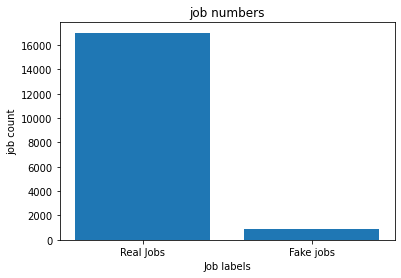

In [8]:
import matplotlib.pyplot as plt
   
labels = ['Real Jobs','Fake jobs']
job = [real_jobs,fake_jobs]

plt.bar(labels,job)
plt.title('job numbers')
plt.xlabel('Job labels')
plt.ylabel('job count')
plt.show()

In [9]:
#sum of null values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
df['data']=df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' +df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' +df['function'] 

In [11]:
#delete the columns with null values
del_cols=['job_id','location','department','salary_range','description','title','company_profile','benefits','requirements']

In [12]:
df=df.drop(del_cols,axis=1)

In [13]:
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,data
0,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NaN
1,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NaN
2,0,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,NaN
...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,NaN
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,NaN
17878,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NaN


In [14]:
stop = set(stopwords.words('english'))

In [15]:
col_list=list(df.columns)

In [16]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [17]:
#replacing null values
for i in col_list:
    if df[i].dtype=='object':
        df[i]=df[i].replace(np.nan,df[i].mode()[0],regex=True)
    

In [18]:
df.isnull().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
data                   0
dtype: int64

In [19]:
#lab encoding converting label into numerical format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for i in col_list:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [21]:
df

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,data
0,0,1,0,2,4,1,58,22,0,2074
1,0,1,0,1,6,1,75,7,0,2074
2,0,1,0,1,5,1,58,18,0,2074
3,0,1,0,1,5,1,22,31,0,53
4,0,1,1,1,5,1,51,16,0,2074
...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,1,5,1,22,31,0,2074
17876,0,1,1,1,5,1,61,0,0,1414
17877,0,0,0,1,5,1,58,18,0,2074
17878,0,0,1,0,6,6,48,9,0,2074


In [22]:
y=df['fraudulent']

In [23]:
#drop fradulent to use it as label
x=df.drop(['fraudulent'],axis=1)

In [24]:
#divide the data into train and test
from sklearn.model_selection import train_test_split
x_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8)
x_valid, x_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [25]:
#tranform the train,validation,test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)
x_valid=sc.transform(x_valid)

In [26]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [27]:
y_validationdata= classifier.predict(x_valid)

In [28]:
#fitting on validation data
naive_df1=pd.DataFrame({'actual':y_valid,
                    'predicted':y_validationdata})

In [29]:
naive_df1

,actual,predicted
3878,0,0
12020,0,0
14235,0,0
17252,0,0
16608,0,0
...,...,...
3197,0,0
8174,0,0
3840,0,0
10492,0,0


In [30]:
y_pred_NB  =  classifier.predict(x_test)

In [31]:
naive_df=pd.DataFrame({'actual':y_test,
                    'predicted':y_pred_NB})

In [32]:
#prediction
naive_df

#build accuracy score,confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_NB)
ac = accuracy_score(y_test,y_pred_NB)

In [33]:
print("accuracy_score",ac)

accuracy_score 0.9183445190156599


In [34]:
print("confusion matrix\n",cm)

confusion matrix
 [[1630   62]
 [  84   12]]


In [35]:
#probability of the class
p1=(cm[0][0]+cm[0][1])/(cm[0][0]+cm[0][1]+cm[1][1]+cm[1][0])
p2= (cm[1][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])


In [36]:
print("Probability of class1",p1)
print("Probability of class2",p2)
print("Final Accuracy",ac)

Probability of class1 0.9463087248322147
Probability of class2 0.053691275167785234
Final Accuracy 0.9183445190156599


In [37]:
cm

array([[1630,   62],
       [  84,   12]])

In [38]:
#from sklearn.tree import DecisionTreeClassifier
#clf_entropy = DecisionTreeClassifier(
 #          criterion = "entropy", random_state = 100,
  #        max_depth = 3, min_samples_leaf = 5)
#clf_entropy.fit(x_train, y_train)


In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(
           criterion = "gini", random_state = 120,
          max_depth = 10, min_samples_leaf = 10)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=120)

In [40]:
y_pred_DT  =  clf_entropy.predict(x_test)

In [41]:
dt_df=pd.DataFrame({'actual':y_test,
                    'predicted':y_pred_DT})

In [42]:
dt_df

,actual,predicted
13743,0,0
13844,0,0
4544,0,0
2858,0,0
8857,0,0
...,...,...
2100,0,0
10770,0,0
2650,0,0
10278,0,0


In [43]:
#accuracy for decision tree
ac1 = accuracy_score(y_test,y_pred_DT)
print("Accuracy of Decision Tree is",ac1)

Accuracy of Decision Tree is 0.9546979865771812


In [44]:
#from sklearn.svm import SVC
#clf_svm = SVC(kernel='linear')
#clf_svm.fit(x_train, y_train)


In [45]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='poly')
clf_svm.fit(x_train, y_train)


SVC(kernel='poly')

In [46]:
#from sklearn.svm import SVC
#clf_svm = SVC(kernel='sigmoid')
#clf_svm.fit(x_train, y_train)


In [47]:
# testing the model
y_pred_SVM = clf_svm.predict(x_test)

In [48]:
svm_df=pd.DataFrame({'actual':y_test,
                    'predicted':y_pred_SVM})

In [49]:
svm_df

,actual,predicted
13743,0,0
13844,0,0
4544,0,0
2858,0,0
8857,0,0
...,...,...
2100,0,0
10770,0,0
2650,0,0
10278,0,0


In [50]:
#accuracy for svm
ac2 = accuracy_score(y_test,y_pred_SVM)
ac2

0.9491051454138703

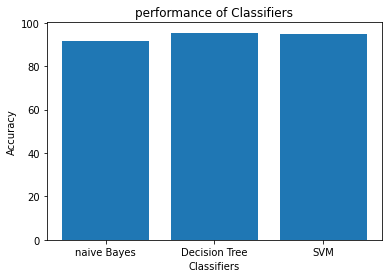

In [51]:
import matplotlib.pyplot as plt
   
Classifiers = ['naive Bayes','Decision Tree','SVM']
accuarcy = [ac*100,ac1*100,ac2*100]

plt.bar(Classifiers,accuarcy)
plt.title('performance of Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.show()